In [20]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn
from lxml import html
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Получаем 250 самых топовых фильмов

In [2]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

Парсим страницу с фильмами и получаем грязные данные с


1.   Названием фильма
2.   Рейтингом
3.   Командой 
4.   Ссылкой на основную страницу




In [3]:
movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [5]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data

,movies,ratings,crew,links
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235262932758483,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.15613962405348,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989551298496979,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984037626539502,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951084780267884,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Дерсу Узала], \n, [(19...",8.006944940163102,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [Стальной гигант], \n, ...",8.005089772411752,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [Аладдин], \n, [(1992)]...",8.005066358362127,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/
248,"[\n 249.\n , [Прислуга], \n, [(2011)...",8.004908248357196,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/


Несколько функциий для преобзразования грязных заголовков с названием фильмов


In [11]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()

In [12]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]

In [13]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)

In [10]:
data.head()

,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235262932758483,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,Побег из Шоушенка,1994
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.15613962405348,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,Крёстный отец,1972
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989551298496979,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,Темный рыцарь,2008
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984037626539502,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,Крёстный отец 2,1974
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951084780267884,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,12 рaзгневанных мужчин,1957


In [ ]:
data.crew[1]

'Francis Ford Coppola (dir.), Marlon Brando, Al Pacino'

Задача 1.
Получить список всех участников команд (убрать постфикс `(dir.)` у директоров). Найти количество уникальных имен. 

Задача 2.
Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

Задача 3. Найти участника(ов) команд, у которого(ых) больше всего фильмов в топе.

Задача 4. Построить распределение топовых фильмов по годам

Задача 5. Построить распределение топовых фильмов рейтингу:


*   Округлить до сотых и отрисовать
*   Округлить до десятых и отрисовать
*   Округлить до целых и отрисовать

Задача 6. Используйте ссылку `http://www.imdb.com/` и динамически добавляя ссылку на фильм из колонки `links` соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.










In [ ]:
 film_url = 'http://www.imdb.com/title/tt0068646/'
 html_text = requests.get(film_url).text

In [ ]:
soup = BeautifulSoup(html_text, 'lxml')
soup.find_all(attrs={"name": "description"})[0].get("content")

'The Godfather: Directed by Francis Ford Coppola. With Marlon Brando, Al Pacino, James Caan, Richard S. Castellano. The aging patriarch of an organized crime dynasty in postwar New York City transfers control of his clandestine empire to his reluctant youngest son.'


Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with. 


Задача 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:`9.2 based on 2,554,919 user ratings`. Из этого текста нужно достать = `2,554,919`. Подсказка: используя метод `find_all` с аргументом `attrs` в который нужно передать `{'class': 'ratingColumn imdbRating'}` от страници `http://www.imdb.com/chart/top`. Найдите 10 фильмов (вывести их название и кол-во оценок) у которых, самое большое количество оценок.


Задача 9. Постройте топ 10 слов, которые встречаются 

1.   в названии фильмов
2.   в описании фильмов
3.   в названии и в описании фильмов


Задача 10*. Спарсить теги фильмов со страницы каждого фильма, так например для `The Godfather` ожидается получить список из `Crime, Drama`. (Можно увидеть эти теги по картинкой к фильму)


ВЫПОЛНЕНИЕ ЗАДАНИЙ НИЖЕ (так получилось, что удобнее выполнить сначала №2, а потом № 1)

Задание 2. Получить список всех директоров. Построить распределение (визуализация обязательна) и найти директора(ов), у которого(ых) больше всего фильмов в топе.

In [14]:
def get_director(s):
    s = s.split(',')
    res = [x.strip() for x in s]
    for x in res:
        if r'(dir.)' in x:
            x = str(x.replace(r'(dir.)', ''))
            x = x.strip()
            return x

In [15]:
data['directors'] = data.crew.apply(get_director)

In [16]:
directors = set(data['directors'])
print(f'Количество уникальных директоров {len(directors)}')

Количество уникальных директоров 154


In [17]:
dir_films = dict()
for director in list(directors):
    dir_films[director] = list(data['directors'].values).count(director)

In [18]:
print(r'Больше всего фильмов в топе у следующих директоров:')
for key, value in dir_films.items():
    if value > 3:
        print(f'{key} снял {value} фильмов')

Больше всего фильмов в топе у следующих директоров:
Christopher Nolan снял 7 фильмов
Billy Wilder снял 5 фильмов
Akira Kurosawa снял 7 фильмов
Hayao Miyazaki снял 4 фильмов
Quentin Tarantino снял 5 фильмов
Sergio Leone снял 4 фильмов
Alfred Hitchcock снял 6 фильмов
Steven Spielberg снял 7 фильмов
Stanley Kubrick снял 7 фильмов
Charles Chaplin снял 5 фильмов
Martin Scorsese снял 7 фильмов


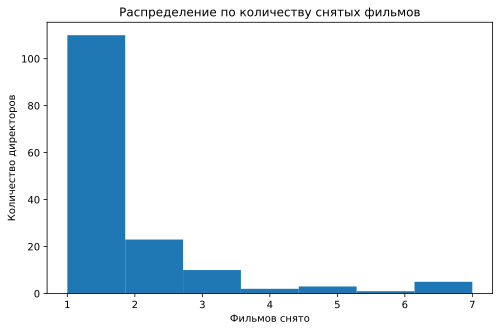

In [21]:
plt.hist(list(dir_films.values()), bins=7)
plt.title('Распределение по количеству снятых фильмов')
plt.xlabel('Фильмов снято')
plt.ylabel('Количество директоров')
plt.show()

Задание 1. Получить список всех участников команд (убрать постфикс (dir.) у директоров). Найти количество уникальных имен.

In [22]:
def get_list_crew(s):
    s = s.split(',')
    res = [x.replace(r'(dir.)', '') for x in s]
    res = [x.strip() for x in res]
    return res

In [23]:
data['crew'] = data.crew.apply(get_list_crew)
data

,movies,ratings,crew,links,title,year,directors
0,"[\n 1.\n , [Побег из Шоушенка], \n, ...",9.235262932758483,"[Frank Darabont, Tim Robbins, Morgan Freeman]",/title/tt0111161/,Побег из Шоушенка,1994,Frank Darabont
1,"[\n 2.\n , [Крёстный отец], \n, [(19...",9.15613962405348,"[Francis Ford Coppola, Marlon Brando, Al Pacino]",/title/tt0068646/,Крёстный отец,1972,Francis Ford Coppola
2,"[\n 3.\n , [Темный рыцарь], \n, [(20...",8.989551298496979,"[Christopher Nolan, Christian Bale, Heath Ledger]",/title/tt0468569/,Темный рыцарь,2008,Christopher Nolan
3,"[\n 4.\n , [Крёстный отец 2], \n, [(...",8.984037626539502,"[Francis Ford Coppola, Al Pacino, Robert De Niro]",/title/tt0071562/,Крёстный отец 2,1974,Francis Ford Coppola
4,"[\n 5.\n , [12 рaзгневанных мужчин],...",8.951084780267884,"[Sidney Lumet, Henry Fonda, Lee J. Cobb]",/title/tt0050083/,12 рaзгневанных мужчин,1957,Sidney Lumet
...,...,...,...,...,...,...,...
245,"[\n 246.\n , [Дерсу Узала], \n, [(19...",8.006944940163102,"[Akira Kurosawa, Maksim Munzuk, Yuriy Solomin]",/title/tt0071411/,Дерсу Узала,1975,Akira Kurosawa
246,"[\n 247.\n , [Стальной гигант], \n, ...",8.005089772411752,"[Brad Bird, Eli Marienthal, Harry Connick Jr.]",/title/tt0129167/,Стальной гигант,1999,Brad Bird
247,"[\n 248.\n , [Аладдин], \n, [(1992)]...",8.005066358362127,"[Ron Clements, Scott Weinger, Robin Williams]",/title/tt0103639/,Аладдин,1992,Ron Clements
248,"[\n 249.\n , [Прислуга], \n, [(2011)...",8.004908248357196,"[Tate Taylor, Viola Davis, Emma Stone]",/title/tt1454029/,Прислуга,2011,Tate Taylor


In [24]:
full_list = []
for i in range(data.crew.shape[0]):
    full_list.extend(data.crew[i])
print(f'Полный список с повторениями имеет длину {len(full_list)}')

Полный список с повторениями имеет длину 750


In [25]:
unique_participants = set(full_list)
print(f'Количество уникальных актеров и директоров {len(unique_participants)}')

Количество уникальных актеров и директоров 527


In [26]:
unique_names = set([x.split()[0].strip() for x in unique_participants])
print(f'Количество уникальных имен {len(unique_names)}')

Количество уникальных имен 377


In [27]:
#для того, чтобы получить список актеров, вычтем из общего списка участников список режиссеров
unique_actors = set(unique_participants) - set(directors)
print(len(unique_actors))

373


In [28]:
all_list = []
for x in data.crew.values:
    all_list.extend(x)

actors_dict = {}
for actor in unique_actors:
    actors_dict[actor] = all_list.count(actor)

In [29]:
sorted_actors = {k: v for k, v in sorted(actors_dict.items(), key=lambda item: item[1], reverse= True)}
for x in list(sorted_actors)[:10]:
    print(f'{x} сыграл в {sorted_actors[x]} фильмах из топа')

Robert De Niro сыграл в 9 фильмах из топа
Tom Hanks сыграл в 6 фильмах из топа
Harrison Ford сыграл в 6 фильмах из топа
Leonardo DiCaprio сыграл в 5 фильмах из топа
Christian Bale сыграл в 5 фильмах из топа
Al Pacino сыграл в 4 фильмах из топа
Brad Pitt сыграл в 4 фильмах из топа
Matt Damon сыграл в 4 фильмах из топа
James Stewart сыграл в 4 фильмах из топа
Toshirô Mifune сыграл в 4 фильмах из топа


Задание 4. Построить распределение топовых фильмов по годам

In [30]:
first_year = min(data.year.values.astype(int))
print(first_year)

1921


In [31]:
last_year = max(data.year.values.astype(int))
print(last_year)

2022


In [32]:
num_of_bins = last_year - first_year
print(num_of_bins)

101


In [33]:
all_years = list(range(first_year, last_year))

In [34]:
year_films = dict()
for year in all_years:
    year_films[str(year)] = list(data.year.astype(int)).count(year)

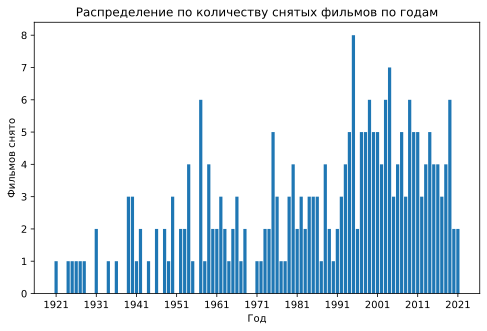

In [35]:
plt.bar(year_films.keys(), year_films.values())
plt.title('Распределение по количеству снятых фильмов по годам')
plt.ylabel('Фильмов снято')
plt.xlabel('Год')
plt.xticks(np.arange(0, num_of_bins, 10))
plt.show()

Задание 5. Построить распределение топовых фильмов рейтингу:
Округлить до целых и отрисовать
Округлить до десятых и отрисовать
Округлить до сотых и отрисовать

In [36]:
# округление рейтингов
ratings_2 = data.ratings.values.astype(float).round(2)
ratings_1 = data.ratings.values.astype(float).round(1)
ratings_0 = data.ratings.values.astype(float).round(0)

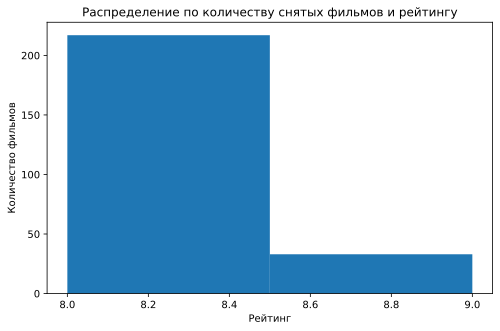

In [37]:
# рейтинг для целых
plt.hist(list(ratings_0), bins = 2)
plt.title('Распределение по количеству снятых фильмов и рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()

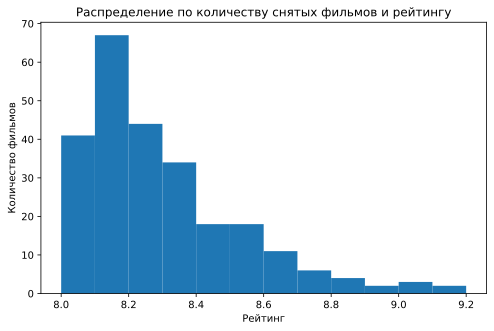

In [38]:
# рейтинг для десятых
num_bin = len(set(ratings_1))
plt.hist(list(ratings_1), bins = num_bin)
plt.title('Распределение по количеству снятых фильмов и рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()

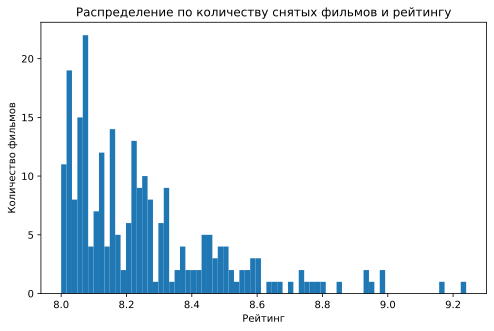

In [39]:
# рейтинг для сотых
num_bin = len(set(ratings_2))
plt.hist(list(ratings_2), bins = num_bin)
plt.title('Распределение по количеству снятых фильмов и рейтингу')
plt.xlabel('Рейтинг')
plt.ylabel('Количество фильмов')
plt.show()

Задание 6. Используйте ссылку http://www.imdb.com/ и динамически добавляя ссылку на фильм из колонки links соберите описание фильмов. Пример поиска необходимого текст представлен ниже. Добавьте эту информацию в исходный датафрейм.

In [40]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
def get_description(link):
    base_uri = "https://www.imdb.com"
    film_uri = base_uri + link
    result = requests.get(film_uri, headers=headers)
    html_text = result.text
    soup = BeautifulSoup(html_text, 'lxml')
    describe = soup.find_all(attrs={"name": "description"})[0].get("content")
    return describe

In [41]:
# получаем описание для каждого фильма
data['plot'] = data.links.apply(get_description)

In [42]:
data['plot']

0      Побег из Шоушенка: Directed by Frank Darabont....
1      Крёстный отец: Directed by Francis Ford Coppol...
2      Темный рыцарь: Directed by Christopher Nolan. ...
3      Крёстный отец 2: Directed by Francis Ford Copp...
4      12 рaзгневанных мужчин: Directed by Sidney Lum...
                             ...                        
245    Дерсу Узала: Directed by Akira Kurosawa. With ...
246    Стальной гигант: Directed by Brad Bird. With J...
247    Аладдин: Directed by Ron Clements, John Musker...
248    Прислуга: Directed by Tate Taylor. With Emma S...
249    Ганди: Directed by Richard Attenborough. With ...
Name: plot, Length: 250, dtype: object

Задача 7. С помощью регулярных выражений найдите в текстах описания фильмов имена актеров, если это возможно (то есть - они там упоминаются). Добавьте эту информацию в датафрейм и посчитайте, для скольких фильмов получилось это сдлеать. Подсказка: перечисление актеров иногда начинается с with.

Получился способ найти актеров без помощи регулярных выражений. Он основан на наблюдении за структурой описания. 
Посмотрим на примере. Сначала отрежем по слову with, потом по первой точке, так как как правило перечисление актеров идет в первом или втором предложении описания

In [43]:
data["plot"][0].lower()

'побег из шоушенка: directed by frank darabont. with tim robbins, morgan freeman, bob gunton, william sadler. two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

In [44]:
data["plot"][0].lower().split('with')[1]

' tim robbins, morgan freeman, bob gunton, william sadler. two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'

Несколько примеров

In [45]:
data["plot"][0].lower().split('with')[1].split('.')[0].strip()

'tim robbins, morgan freeman, bob gunton, william sadler'

In [46]:
data["plot"][5].lower().split('with')[1].split('.')[0].strip()

'liam neeson, ben kingsley, ralph fiennes, caroline goodall'

Для всего датафрейма

In [47]:
def get_actors_from_description(description):
    return description.lower().split('with')[1].split('.')[0].strip()

In [48]:
data['actors_descr'] = data['plot'].apply(get_actors_from_description)

In [49]:
data['actors_descr'][120:130]

120    lamberto maggiorani, enzo staiola, lianella ca...
121    darsheel safary, aamir khan, tisca chopra, vip...
122    dean-charles chapman, george mackay, daniel ma...
123    bruno ganz, alexandra maria lara, corinna harf...
124    clint eastwood, lee van cleef, gian maria volo...
125    aamir khan, fatima sana shaikh, sanya malhotra...
126    christian bale, michael caine, liam neeson, ka...
127    charles chaplin, jackie coogan, carl miller, e...
128    marilyn monroe, tony curtis, jack lemmon, geor...
129    olivia colman, anthony hopkins, mark gatiss, o...
Name: actors_descr, dtype: object

Задание 8. Распарсите исходную страницу с топ-250 фильмов и получите для каждого фильмов количество оценок. Пример текста в исходной странице:9.2 based on 2,554,919 user ratings. Из этого текста нужно достать = 2,554,919. Подсказка: используя метод find_all с аргументом attrs в который нужно передать {'class': 'ratingColumn imdbRating'} от страницы http://www.imdb.com/chart/top. Найдите 10 фильмов (вывести их название и кол-во оценок), у которых самое большое количество оценок.

In [50]:
url = r'http://www.imdb.com/chart/top'
result = requests.get(url, headers=headers)
top_text = result.text
top_soup = BeautifulSoup(top_text, 'lxml')
qa = top_soup.find_all(attrs={'class': 'ratingColumn imdbRating'})

In [51]:
numbers_of_assesment = []
for x in qa:
    numbers_of_assesment.append(int(str(x.contents[1]).split(' user')[0].split('on ')[-1].replace(',','')))

In [52]:
data['na'] = pd.Series(numbers_of_assesment)

In [53]:
sorted_assesments = sorted(numbers_of_assesment, reverse=True)
top_10 = sorted_assesments[:10]

In [54]:
for t in top_10:
    need = data[data['na'] == t]
    print(f'Фильм {list(need.title)[0]} набрал {list(need.na)[0]} оценок')

Фильм Побег из Шоушенка набрал 2671856 оценок
Фильм Темный рыцарь набрал 2644704 оценок
Фильм Начало набрал 2344165 оценок
Фильм Бойцовский клуб набрал 2117280 оценок
Фильм Форрест Гамп набрал 2071843 оценок
Фильм Криминальное чтиво набрал 2046844 оценок
Фильм Матрица набрал 1908420 оценок
Фильм Властелин колец: Братство кольца набрал 1870631 оценок
Фильм Крёстный отец набрал 1851745 оценок
Фильм Властелин колец: Возвращение короля набрал 1841370 оценок


Задание 9. Постройте топ 10 слов, которые встречаются:
в названиях фильмов
в описаниях фильмов
в названиях и в описаниях фильмов

Названия

In [56]:
# получим список всех слов, которые встречаются в названиях
total_words_titles = []
for x in list(data.title.values):
    total_words_titles.extend(x.split())
total_titles = [x.lower() for x in total_words_titles]
print(f'Всего слов в названиях {len(total_words_titles)}')

Всего слов в названиях 596


In [57]:
# получим уникальные слова 
unique_words_titles = list(set(total_words_titles))
print(f'Уникальных слов в названиях {len(unique_words_titles)}')

Уникальных слов в названиях 522


In [58]:
# получим словарь: слово - количество повторов
title_dict = {}
for word in unique_words_titles:
    title_dict[word] = total_words_titles.count(word)

In [59]:
sorted_words_title = {k: v for k, v in sorted(title_dict.items(), key=lambda item: item[1], reverse= True)}

In [60]:
for x in list(sorted_words_title)[:10]:
    print(f'Слово {x} встретилось в названиях {sorted_words_title[x]} раз(а)')

Слово и встретилось в названиях 9 раз(а)
Слово В встретилось в названиях 7 раз(а)
Слово на встретилось в названиях 5 раз(а)
Слово в встретилось в названиях 4 раз(а)
Слово Эпизод встретилось в названиях 3 раз(а)
Слово Властелин встретилось в названиях 3 раз(а)
Слово по встретилось в названиях 3 раз(а)
Слово Большой встретилось в названиях 3 раз(а)
Слово отец встретилось в названиях 3 раз(а)
Слово колец: встретилось в названиях 3 раз(а)


Описания

In [61]:
# добавим в датафрейм отдельную колонку, из которой удалим названия фильмов
def get_decr_without_name(d):
    temp = d.split(':')
    del temp[0]
    res = '.'.join(temp).strip()
    return res

In [62]:
data['description'] = data['plot'].apply(get_decr_without_name)

In [63]:
# получим список всех слов, которые встречаются в описаниях
total_words_in_description = []
for x in list(data['description'].values):
    total_words_in_description.extend(x.split())
total_words_in_description = [x.lower() for x in total_words_in_description]
print(f'Всего слов в описаниях {len(total_words_in_description)}')

Всего слов в описаниях 10104


In [64]:
# получим уникальные слова в описаниях
unique_words_in_description = list(set(total_words_in_description))
print(f'Уникальных слов в описаниях {len(unique_words_in_description)}')

Уникальных слов в описаниях 4312


In [65]:
# получим словарь: слова - количество повторов
des_dict = {}
for word in unique_words_in_description:
    des_dict[word] = total_words_in_description.count(word)

In [66]:
sorted_words_des = {k: v for k, v in sorted(des_dict.items(), key=lambda item: item[1], reverse= True)}

In [67]:
for x in list(sorted_words_des)[:10]:
    print(f'Слово {x} встретилось в описаниях {sorted_words_des[x]} раз(а)')

Слово a встретилось в описаниях 394 раз(а)
Слово the встретилось в описаниях 358 раз(а)
Слово with встретилось в описаниях 312 раз(а)
Слово by встретилось в описаниях 293 раз(а)
Слово directed встретилось в описаниях 250 раз(а)
Слово to встретилось в описаниях 230 раз(а)
Слово of встретилось в описаниях 205 раз(а)
Слово and встретилось в описаниях 175 раз(а)
Слово in встретилось в описаниях 150 раз(а)
Слово his встретилось в описаниях 144 раз(а)


Названия и описания

In [68]:
# получим список всех слов
total_words = total_words_titles + total_words_in_description

In [69]:
# получим список всех уникальных слов
unique_words = unique_words_titles + unique_words_in_description

In [70]:
# получим словарь: слова - количество повторов
allwords_dict = {}
for word in unique_words:
    allwords_dict[word] = total_words.count(word)

In [71]:
sorted_words_all = {k: v for k, v in sorted(allwords_dict.items(), key=lambda item: item[1], reverse= True)}

In [72]:
for x in list(sorted_words_all)[:10]:
    print(f'Слово {x} встретилось {sorted_words_all[x]} раз(а)')

Слово a встретилось 394 раз(а)
Слово the встретилось 359 раз(а)
Слово with встретилось 312 раз(а)
Слово by встретилось 293 раз(а)
Слово directed встретилось 250 раз(а)
Слово to встретилось 232 раз(а)
Слово of встретилось 206 раз(а)
Слово and встретилось 175 раз(а)
Слово in встретилось 150 раз(а)
Слово his встретилось 144 раз(а)


Данные не отличаются от топа слов в описаниях, так как названия на русском, а описания на английском. Следовательно, к количеству топовых слов названия ничего не прибавляют, они где-то внизу общей таблицы

Задание 10*. Спарсить теги фильмов со страницы каждого фильма, так например для The Godfather ожидается получить список из Crime, Drama. (Можно увидеть эти теги по картинкой к фильму)

In [73]:
def get_tags(link):
    base_uri = "https://www.imdb.com"
    film_uri = base_uri + link
    result = requests.get(film_uri, headers=headers)
    html_text = result.text
    soup = BeautifulSoup(html_text, 'lxml')
    qa = soup.find_all(attrs={'class': 'ipc-chip__text'})
    res = []
    for x in qa:
        if x.text != "Back to top":
            res.append(x.text)
    return res

In [74]:
data['tags'] = data.links.apply(get_tags)

In [75]:
data['tags']

0                             [Drama]
1                      [Crime, Drama]
2              [Action, Crime, Drama]
3                      [Crime, Drama]
4                      [Crime, Drama]
                    ...              
245     [Adventure, Biography, Drama]
246    [Animation, Action, Adventure]
247    [Animation, Adventure, Comedy]
248                           [Drama]
249       [Biography, Drama, History]
Name: tags, Length: 250, dtype: object